                                        IX.	APPENDIX: SOURCE CODE

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)
bikes =pd.read_csv("day.csv")
import dataframe_image as dfi

dfi.export(bikes.head(), "SampleOfDataset.png")
bikes.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [2]:
bikes.drop(columns=['instant','casual','registered'],inplace=True)
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [3]:
type(bikes['dteday'][0])

str

In [4]:
bikes['dteday']=pd.DatetimeIndex(bikes['dteday']).day
type(bikes['dteday'][0])

numpy.int64

In [5]:

bikes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    int64  
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  cnt         731 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.4 KB


array([[<AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'hum'}>,
        <AxesSubplot:title={'center':'windspeed'}>],
       [<AxesSubplot:title={'center':'cnt'}>, <AxesSubplot:>]],
      dtype=object)

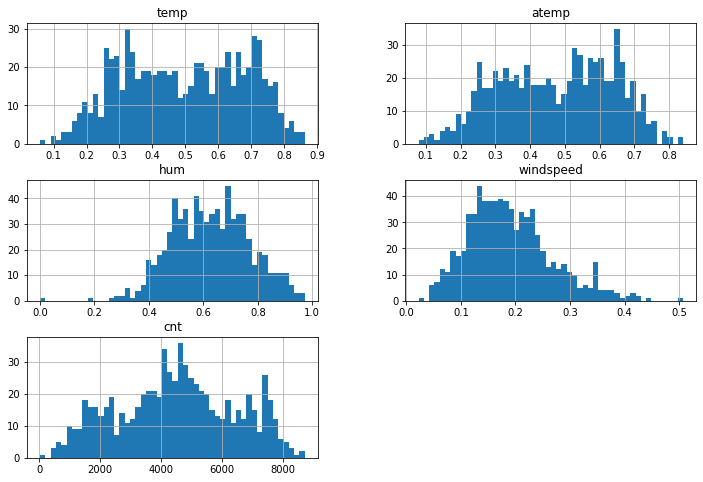

In [6]:
import matplotlib.pyplot as plt 

num_attributes=['temp','atemp','hum','windspeed']
cat_attributes=['dteday','season','yr',	'mnth',	'holiday',	'weekday',	'workingday',	'weathersit']
bikes.hist(bins=50,figsize=(12,8),column=['temp','atemp','hum','windspeed','cnt'])

In [7]:
#bikes.drop(bikes[bikes['windspeed']>.5].index,inplace=True)
#bikes.drop(bikes[bikes['hum']<.2].index,inplace=True)


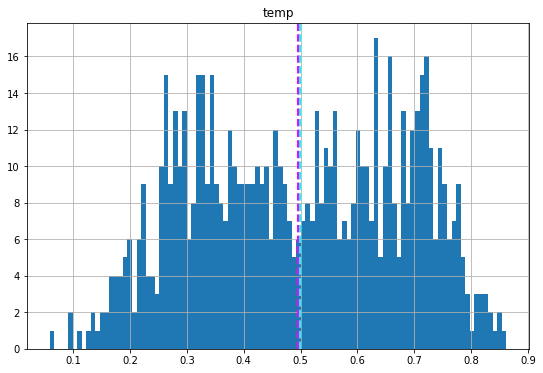

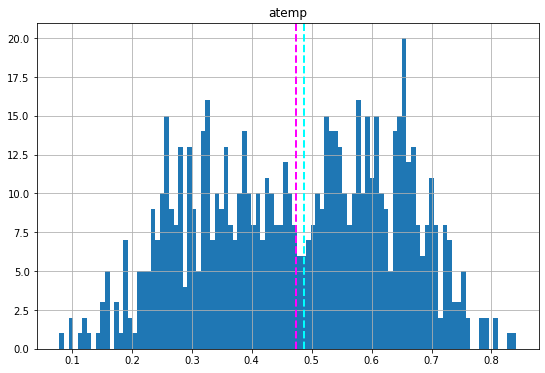

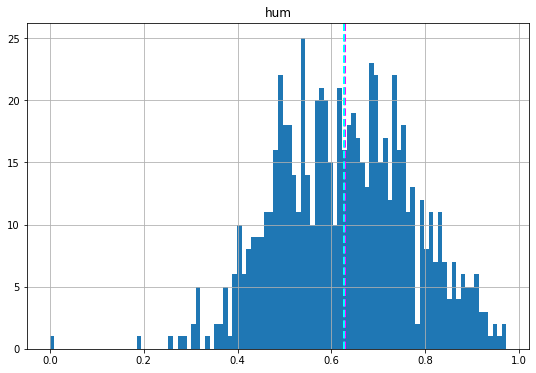

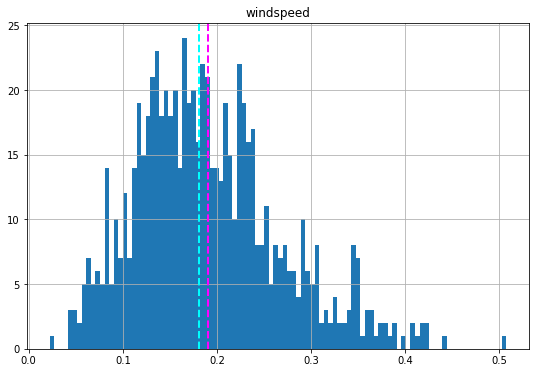

In [8]:
# Plot a histogram for each numeric feature
for col in num_attributes:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bikes[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

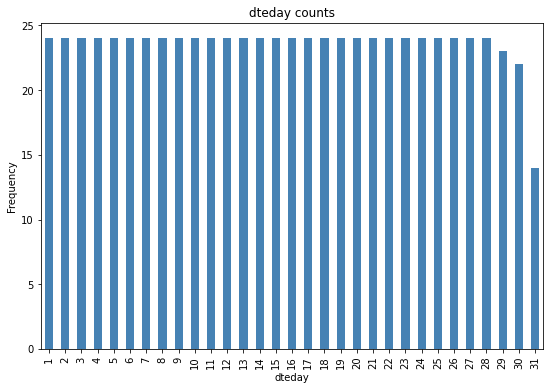

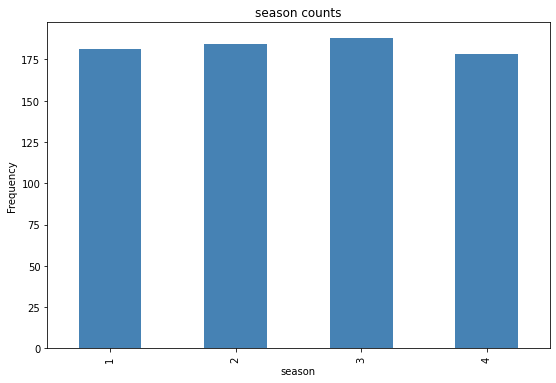

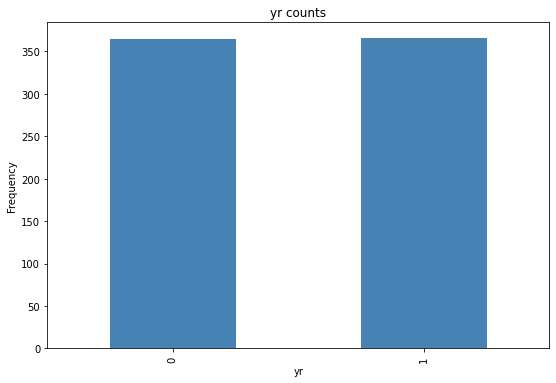

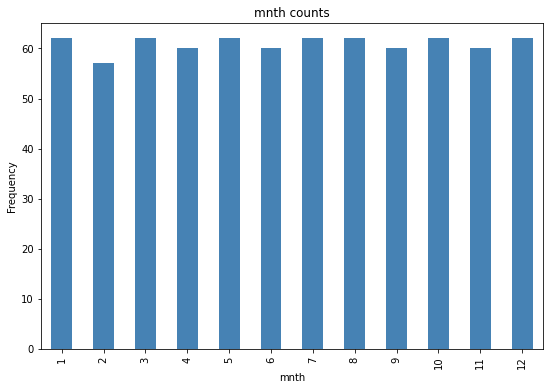

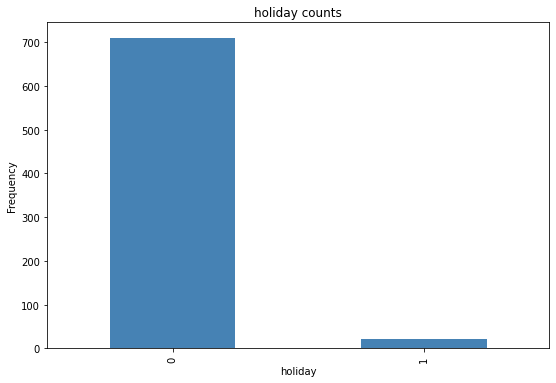

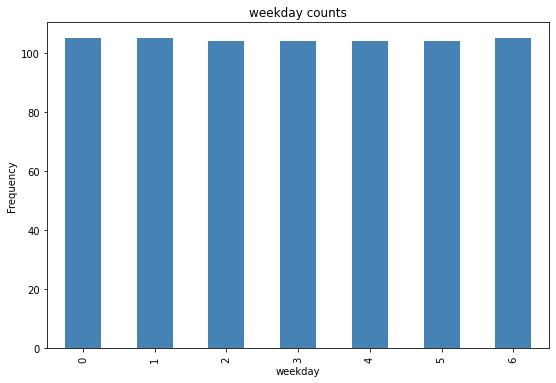

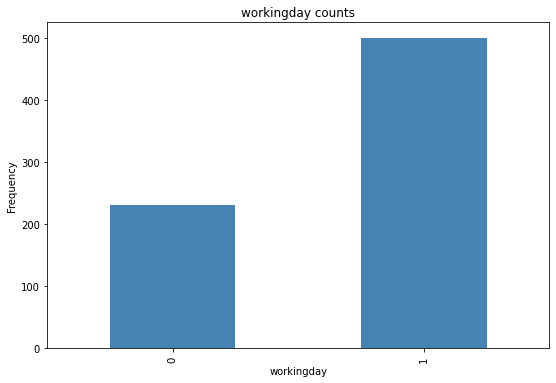

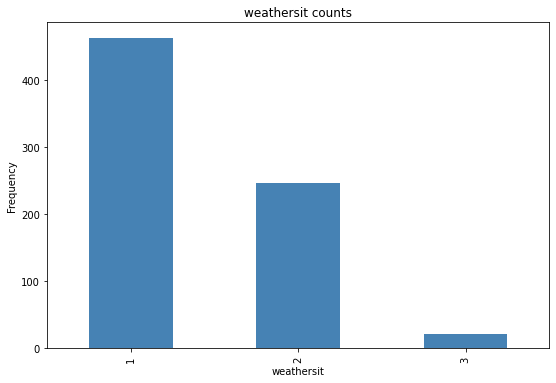

In [9]:
for col in cat_attributes:
    counts = bikes[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [10]:
duplication=bikes.duplicated().value_counts()
#duplication_sum=data.data.duplicated().sum()
duplication

False    731
dtype: int64

In [11]:
bikes["weathersit"].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

In [12]:
statistics=bikes[num_attributes+['cnt']].describe()
import dataframe_image as dfi

dfi.export(statistics, "statistics.png")
statistics

,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,4504.348837
std,0.183051,0.162961,0.142429,0.077498,1937.211452
min,0.059130,0.079070,0.000000,0.022392,22.000000
25%,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,5956.000000
max,0.861667,0.840896,0.972500,0.507463,8714.000000


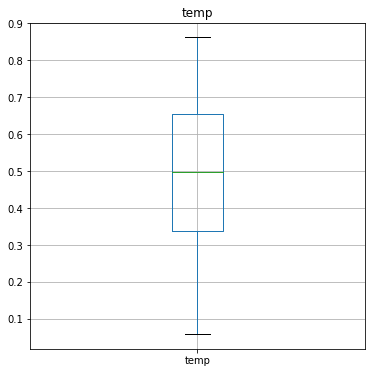

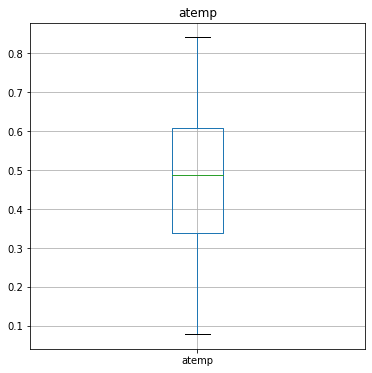

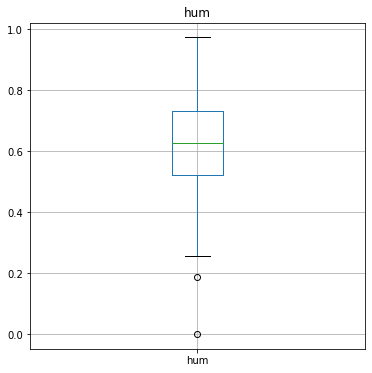

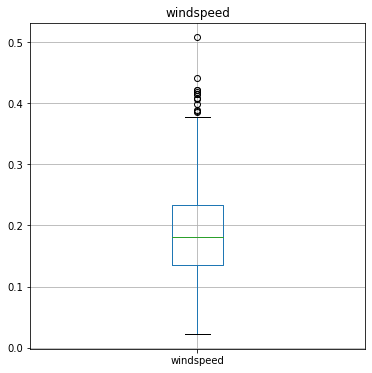

In [13]:
#Check Outliers in numarical features by using boxplot :
from matplotlib import pyplot as plt

type(num_attributes)
for col in num_attributes:
    bikes.boxplot(column=col, figsize=(6,6))
    plt.title(col)
    plt.show()

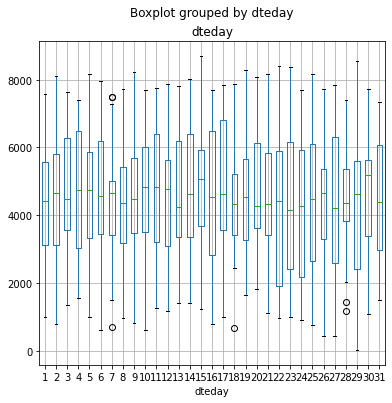

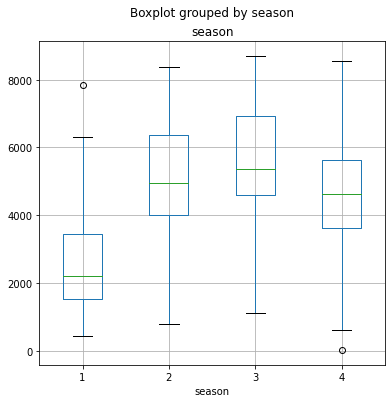

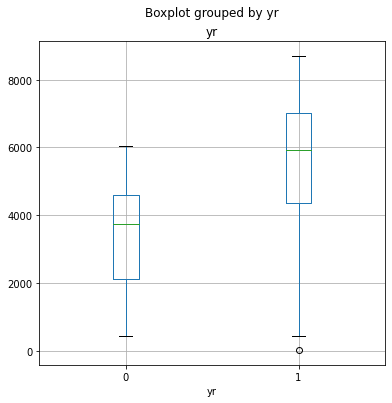

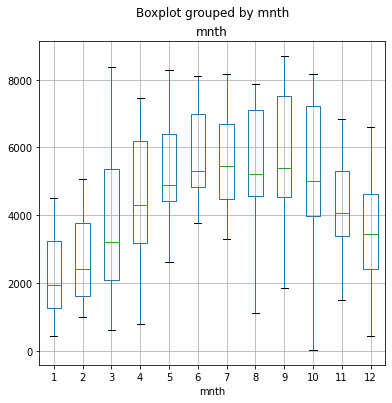

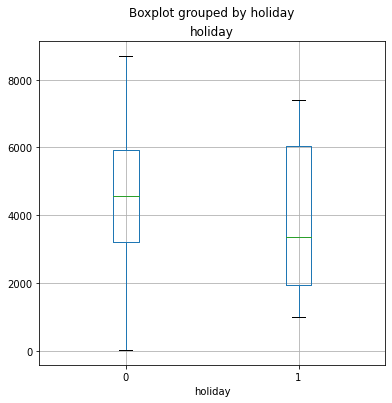

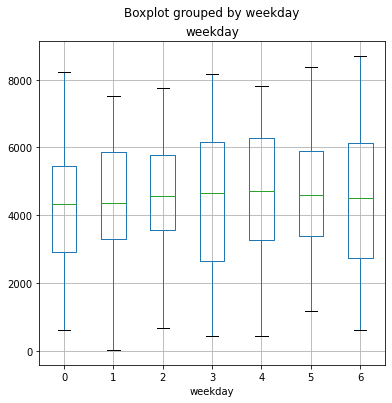

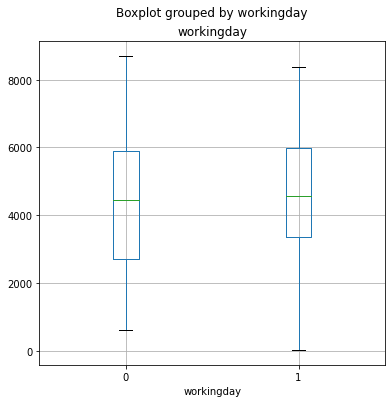

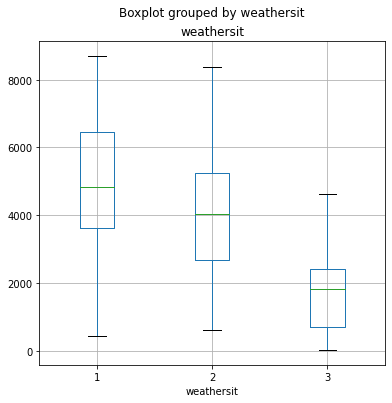

In [14]:
#take insghts for the relation between each categorical feature and the rental counts:
from matplotlib import pyplot as plt
for col in cat_attributes:
    bikes.boxplot(column='cnt',by=col, figsize=(6,6))
    plt.title(col)
    plt.show()

In [15]:
X=bikes.drop(columns='cnt')
y=bikes['cnt']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0,shuffle=True,
                                                    stratify=bikes['holiday'])


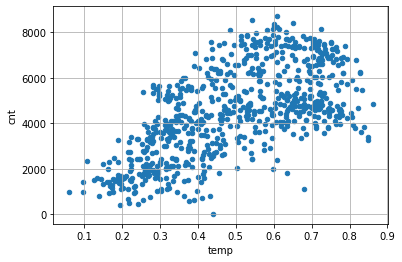

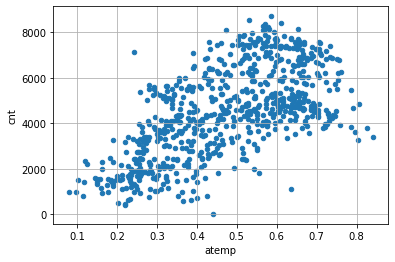

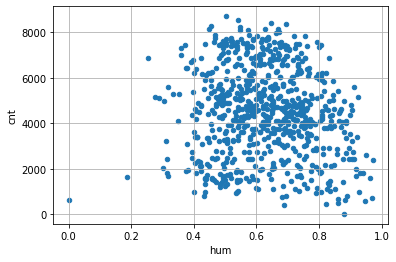

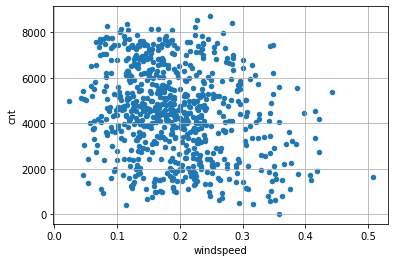

In [17]:
for num_attribute in num_attributes:
    bikes.plot(kind='scatter',x=num_attribute,y='cnt',grid=True)
    plt.show()

In [18]:
bikes[num_attributes+['cnt']].corr()['cnt'].sort_values(ascending=False)

cnt          1.000000
atemp        0.631066
temp         0.627494
hum         -0.100659
windspeed   -0.234545
Name: cnt, dtype: float64

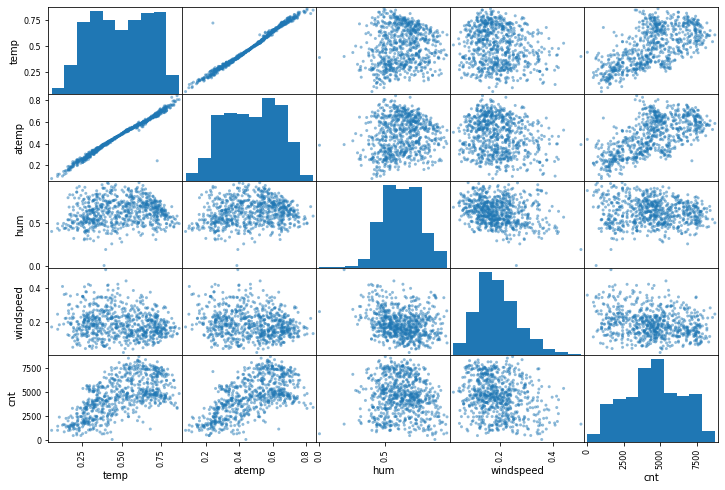

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(bikes[num_attributes+['cnt']],figsize=(12,8))
plt.show()


In [20]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR 
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score,cross_val_predict
import numpy as np
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.preprocessing import FunctionTransformer


train_results=[] 
test_results=[]
confidence_intervals=[]
reg={'LinearRegression':LinearRegression(),
    'GradientBoostingRegressor':GradientBoostingRegressor(random_state=42),
    'Lasso':Lasso(random_state=42),
    'Ridge':Ridge(random_state=42),
    'ElasticNet':ElasticNet(random_state=42),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor':RandomForestRegressor(random_state=42),
    'LinearSVR':LinearSVR(max_iter=50000,random_state=42),
    'SVR':  SVR(max_iter=50000)}


num_pipline=make_pipeline(SimpleImputer(strategy='mean'),StandardScaler())
cat_pipeline=make_pipeline(SimpleImputer(strategy='most_frequent'))

#date_pipeline=make_pipeline(FunctionTransformer(lambda x:pd.DatetimeIndex(x).day))
preprocessing=ColumnTransformer([('num', num_pipline, num_attributes),
                                ('cat',cat_pipeline,cat_attributes),
                                #('day',date_pipeline,['dteday'])
                                ])

#data_prepared=preprocessing.fit_transform(Xtrain)
#data_prepared.shape



In [21]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,cross_val_predict

for key in reg.keys():
    full_pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('reg',reg[key]),
    ])
    #train
    score=-cross_val_score(full_pipeline, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)
    train_rmse=score.mean()/y.mean()
    train_prediction=cross_val_predict(full_pipeline,X_train,y_train,cv=10)
    train_mse=mean_squared_error(y_pred=train_prediction,y_true=y_train)
    train_mse=train_mse.round(1)/y.mean()
    train_r2=r2_score(y_true=y_train,y_pred=train_prediction)
    train_results.append((key,train_rmse,train_mse,train_r2))
    #train_results.append({key: {'train_rmse': train_rmse,'train_mse': train_mse,'train_r2': train_r2}})
    #train_results.append((key,train_rmse,train_mse,train_r2))

    #test
    test_prediction=cross_val_predict(full_pipeline,X_test,y_test,cv=10)
    test_rmse=mean_squared_error(y_pred=test_prediction,y_true=y_test,squared=False).round(1)/y.mean()
    test_mse=mean_squared_error(y_pred=test_prediction,y_true=y_test)
    test_mse=test_mse.round(1)/y.mean()
    test_r2=r2_score(y_true=y_test,y_pred=test_prediction)
    #test_results.append({key: {'test_rmse':test_rmse,'test_mse': test_mse,'test_r2':test_r2} })

    test_results.append((key,test_rmse,test_mse,test_r2))


    #confidence intervals:
    #*We* can compute a 95% confidence interval for the test RMSE:
    from scipy import stats

    confidence = 0.95
    squared_errors = (test_prediction - y_test) ** 2
    np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                             loc=squared_errors.mean(),
                             scale=stats.sem(squared_errors)))/y.mean()

    # extra code – computes a confidence interval again using a z-score
    zscore = stats.norm.ppf((1 + confidence) / 2)
    zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(len(squared_errors))
    c1,c2 = np.sqrt(squared_errors.mean() - zmargin)/y.mean(), np.sqrt(squared_errors.mean() 
                    + zmargin)/y.mean()
    #confidence_intervals.append({key: {'c1':c1,'c2':c2,'interval':c2-c1}})
    confidence_intervals.append((key,test_rmse,c1,c2,c2-c1))


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.981e+05, tolerance: 7.058e+04
  model = cd_fast.enet_coordinate_descent(


In [22]:
#results:
print('models train scores:',train_results)
best_trained_model_idx=np.array(train_results)[:,1].argmin()

print('models test scores:',test_results)
best_tested_model_idx=np.array(test_results)[:,1].argmin()


print('best trained model:',train_results[best_trained_model_idx][0],train_results[best_trained_model_idx][1])
print('best tested model:',test_results[best_tested_model_idx][0],test_results[best_tested_model_idx][1])


models train scores: [('LinearRegression', 0.2023969926904546, 188.73718060582277, 0.777568233781897), ('GradientBoostingRegressor', 0.1505670579567554, 103.45308874627621, 0.8780777849917398), ('Lasso', 0.20095482015670615, 186.09202579419372, 0.7806856122244701), ('Ridge', 0.20030279274635607, 184.97161967504272, 0.7820060597458061), ('ElasticNet', 0.2588752243298375, 306.37957890823856, 0.6389235620249492), ('KNeighborsRegressor', 0.32726736382524513, 490.0731448161208, 0.42243581861970314), ('DecisionTreeRegressor', 0.19879152256056962, 180.28972207737226, 0.7875237834774442), ('RandomForestRegressor', 0.15433194877233777, 108.68532116249412, 0.8719114807732652), ('LinearSVR', 0.43471003992493584, 862.1508547295379, -0.01606759463811147), ('SVR', 0.4332451407453959, 848.0450422589023, 0.0005564606657268989)]
models test scores: [('LinearRegression', 0.1976978320692664, 176.05965449410647, 0.7781342751688137), ('GradientBoostingRegressor', 0.14508201376447566, 94.825470991858, 0.880

In [23]:
train_result=pd.DataFrame(train_results,
           columns=['Model','RMSE','MSE','R2_Score']).sort_values(by='RMSE')
import dataframe_image as dfi

dfi.export(train_result, "ModelsTrainingResultsTable.png")
train_result


,Model,RMSE,MSE,R2_Score
1,GradientBoostingRegressor,0.150567,103.453089,0.878078
7,RandomForestRegressor,0.154332,108.685321,0.871911
6,DecisionTreeRegressor,0.198792,180.289722,0.787524
3,Ridge,0.200303,184.971620,0.782006
2,Lasso,0.200955,186.092026,0.780686
0,LinearRegression,0.202397,188.737181,0.777568
4,ElasticNet,0.258875,306.379579,0.638924
5,KNeighborsRegressor,0.327267,490.073145,0.422436
9,SVR,0.433245,848.045042,0.000556
8,LinearSVR,0.434710,862.150855,-0.016068


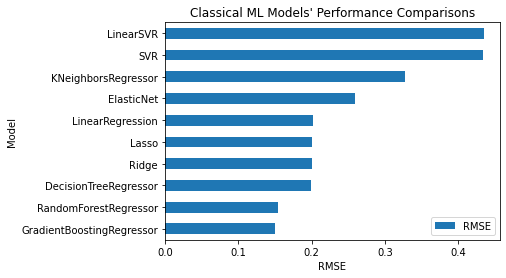

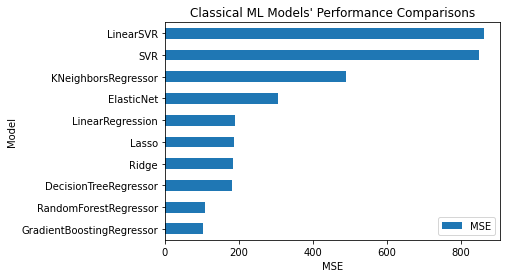

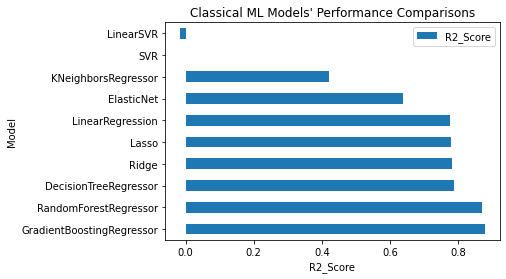

In [24]:
#plt.figure(figsize=(10, 50))
#result.plot.barh(x='Model',subplots=True,sharex=False)
#plt.show()


for score in ['RMSE','MSE','R2_Score']:
    train_result.plot.barh(x='Model',y=score,sharex=False)
    plt.xlabel(score)
    plt.title('Classical ML Models\' Performance Comparisons')
    plt.show()

In [25]:
test_result=pd.DataFrame(test_results,
           columns=['Model','RMSE','MSE','R2_Score']).sort_values(by='RMSE')

import dataframe_image as dfi

dfi.export(test_result, "ModelsTestResultsTable.png")

test_result


,Model,RMSE,MSE,R2_Score
1,GradientBoostingRegressor,0.145082,94.825471,0.880503
7,RandomForestRegressor,0.152231,104.369425,0.868476
3,Ridge,0.195944,172.954677,0.782047
2,Lasso,0.197121,175.040506,0.779419
0,LinearRegression,0.197698,176.059654,0.778134
6,DecisionTreeRegressor,0.209198,197.119302,0.751595
4,ElasticNet,0.260748,306.251125,0.614070
5,KNeighborsRegressor,0.338828,517.150755,0.348300
9,SVR,0.423857,809.246626,-0.019791
8,LinearSVR,0.445991,895.924815,-0.129021


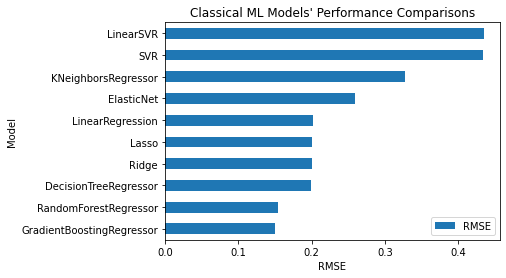

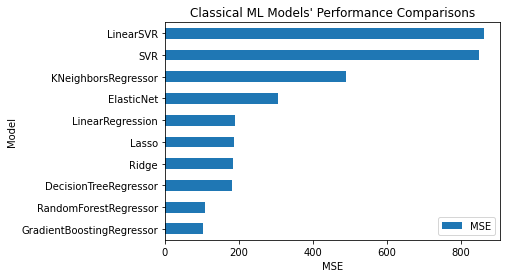

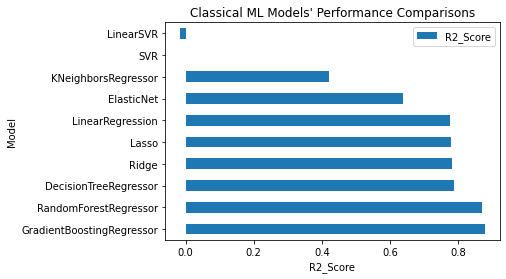

In [26]:

for score in ['RMSE','MSE','R2_Score']:
    train_result.plot.barh(x='Model',y=score,sharex=False)
    plt.xlabel(score)
    plt.title('Classical ML Models\' Performance Comparisons')
    plt.show()

In [27]:
confidence_interval_results=pd.DataFrame(confidence_intervals,
           columns=['Model','RMSE','C1','C2','Confidence Interval']).sort_values(by='C1',ignore_index=True)


import dataframe_image as dfi

dfi.export(confidence_interval_results, "ModelsConfidence_Interval_results.png")

confidence_interval_results




,Model,RMSE,C1,C2,Confidence Interval
0,GradientBoostingRegressor,0.145082,0.123974,0.163506,0.039532
1,RandomForestRegressor,0.152231,0.132778,0.169445,0.036667
2,Ridge,0.195944,0.167118,0.221056,0.053938
3,Lasso,0.197121,0.167421,0.222914,0.055493
4,LinearRegression,0.197698,0.167517,0.223856,0.056339
5,DecisionTreeRegressor,0.209198,0.179834,0.234913,0.055079
6,ElasticNet,0.260748,0.234856,0.284294,0.049438
7,KNeighborsRegressor,0.338828,0.312297,0.363447,0.051150
8,SVR,0.423857,0.390745,0.454573,0.063828
9,LinearSVR,0.445991,0.406966,0.481853,0.074887


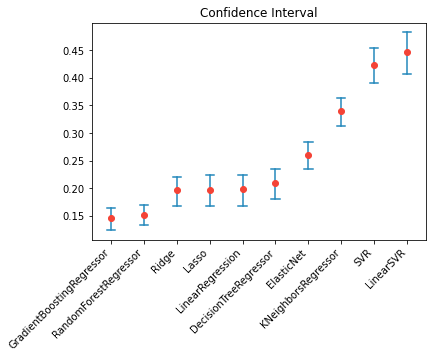

In [28]:
plt.xticks(range(len(confidence_interval_results)),list(confidence_interval_results['Model']),
            rotation = 45, ha="right")
plt.title('Confidence Interval')
for c1,c2,b in zip(confidence_interval_results['C1'],confidence_interval_results['C2'],
                    range(len(confidence_interval_results))):
    color='#2187bb'
    horizontal_line_width=0.25
    left = b - horizontal_line_width / 2
    right = b + horizontal_line_width / 2
    #plt.plot((b,b),(c1,c2),'ro-',color='orange')
    plt.plot([b, b], [c2, c1], color=color)
    plt.plot([left, right], [c2, c2], color=color)
    plt.plot([left, right], [c1, c1], color=color)
    plt.plot(b, confidence_interval_results['RMSE'][b], 'o', color='#f44336')

#plt.xticks(range(len(confidence_interval_results)),list(confidence_interval_results['Model']))
plt.show()

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error,r2_score
from scipy.stats import randint


full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('GradientBoostingRegressor',GradientBoostingRegressor(
                            n_estimators = 500, subsample= 0.5, criterion ='squared_error', 
                            min_samples_split = 6, min_samples_leaf = 1, min_weight_fraction_leaf =0,
                            max_depth = 3, min_impurity_decrease = 0, init = None, random_state = 42,
                            max_features= 8, alpha = 0.01, max_leaf_nodes = None, warm_start = False,
                            validation_fraction=0.1, n_iter_no_change=10, tol= 0.0001, ccp_alpha= 0))
                        ])

                     
param_grid=[{ 
                'GradientBoostingRegressor__max_depth':[4],
                'GradientBoostingRegressor__learning_rate':[0.01,.05,.1],
                'GradientBoostingRegressor__criterion':["friedman_mse",'squared_error'],
                'GradientBoostingRegressor__min_samples_split':[4,6,8],
                'GradientBoostingRegressor__subsample':[.5],
                'GradientBoostingRegressor__max_features':[6],
                'GradientBoostingRegressor__alpha':[.001,0.01],              
            }]
#param=[{ 
#                #'GradientBoostingRegressor__n_estimators':randint(low=100, high=200),
#                'GradientBoostingRegressor__min_samples_split':randint(low=2, high=10),
#                'GradientBoostingRegressor__subsample':np.linspace(start=.1,stop=.9),
#                'GradientBoostingRegressor__max_features':randint(low=5, high=10),
#                'GradientBoostingRegressor__alpha':np.linspace(start=0.0001,stop=.1),
#                
#            }]
#grid_search=RandomizedSearchCV(full_pipeline,param,cv=10,scoring='neg_root_mean_squared_error',random_state=42,verbose=1)

grid_search=GridSearchCV(full_pipeline,param_grid,cv=10,scoring='neg_root_mean_squared_error',verbose=1)


In [30]:
grid_search.fit(X_train,y_train)
print('best score=',-grid_search.best_score_)
rmse=-cross_val_score(grid_search.best_estimator_,X_train,y_train,
                          scoring='neg_root_mean_squared_error',cv=10)
rmse_percentage=rmse.mean().round(1)/y.mean()
print('rmse percentage:',rmse_percentage)
print(grid_search.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
best score= 643.7090628656674
rmse percentage: 0.14290633857718898
{'GradientBoostingRegressor__alpha': 0.001, 'GradientBoostingRegressor__criterion': 'squared_error', 'GradientBoostingRegressor__learning_rate': 0.05, 'GradientBoostingRegressor__max_depth': 4, 'GradientBoostingRegressor__max_features': 6, 'GradientBoostingRegressor__min_samples_split': 4, 'GradientBoostingRegressor__subsample': 0.5}


In [31]:
print('best score=',-grid_search.best_score_/y.mean())
rmse=-cross_val_score(full_pipeline,X_train,y_train,scoring='neg_root_mean_squared_error',cv=10)
rmse.mean()
rmse_percentage=rmse.mean()/y.mean()
print('rmse percentage:',rmse_percentage)
print(grid_search.best_params_)

best score= 0.142908350602899
rmse percentage: 0.1505154962839044
{'GradientBoostingRegressor__alpha': 0.001, 'GradientBoostingRegressor__criterion': 'squared_error', 'GradientBoostingRegressor__learning_rate': 0.05, 'GradientBoostingRegressor__max_depth': 4, 'GradientBoostingRegressor__max_features': 6, 'GradientBoostingRegressor__min_samples_split': 4, 'GradientBoostingRegressor__subsample': 0.5}


In [32]:
grid_search.best_estimator_['GradientBoostingRegressor'].n_estimators_

131

In [33]:
import dataframe_image as dfi
best_params=grid_search.best_params_
best_params['GradientBoostingRegressor__n_estimators_']=grid_search.best_estimator_['GradientBoostingRegressor'].n_estimators_
GBR_best_param=pd.DataFrame.from_dict(grid_search.best_params_,orient='index',columns=['best value'])
GBR_best_param['best value']

dfi.export(GBR_best_param, "Grid_BestHyperParameters.png")

GBR_best_param



,best value
GradientBoostingRegressor__alpha,0.001
GradientBoostingRegressor__criterion,squared_error
GradientBoostingRegressor__learning_rate,0.05
GradientBoostingRegressor__max_depth,4
GradientBoostingRegressor__max_features,6
GradientBoostingRegressor__min_samples_split,4
GradientBoostingRegressor__subsample,0.5
GradientBoostingRegressor__n_estimators_,131


In [34]:
from sklearn.metrics import mean_squared_error,r2_score

final_model=grid_search.best_estimator_
final_prediction=final_model.predict(X_test)
final_rmse=mean_squared_error(y_pred=final_prediction,y_true=y_test,squared=False)
final_rmse_percentage=final_rmse.round(1)/y.mean()
print('final rmse percentage:',final_rmse_percentage)
#train the best model in the whole data set including the train and test datat set.
model=final_model.fit(X,y)


final rmse percentage: 0.13158394729641124


In [35]:
feature_importances = final_model["GradientBoostingRegressor"].feature_importances_
feature_importances.round(2)

array([0.29, 0.16, 0.06, 0.04, 0.02, 0.08, 0.27, 0.03, 0.  , 0.02, 0.  ,
       0.04])

In [36]:
features_imoprtance=sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),reverse=True)

features_imoprtance=pd.DataFrame(features_imoprtance,
           columns=['importance','features'])

import dataframe_image as dfi

dfi.export(features_imoprtance, "FeatureImportanceTable.png")
features_imoprtance


,importance,features
0,0.287367,num__temp
1,0.265890,cat__yr
2,0.160682,num__atemp
3,0.082350,cat__season
4,0.057751,num__hum
5,0.037859,num__windspeed
6,0.037467,cat__weathersit
7,0.025830,cat__mnth
8,0.020664,cat__dteday
9,0.016149,cat__weekday


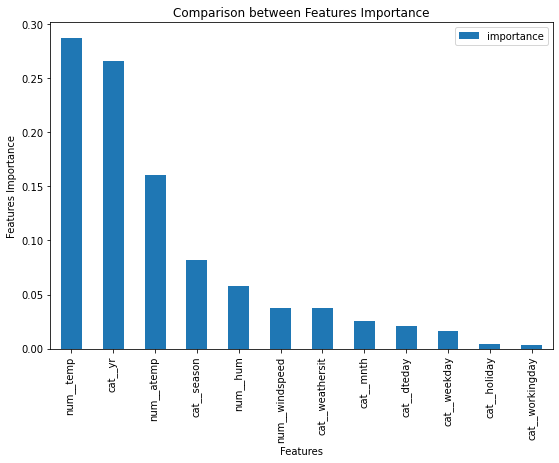

In [37]:
features_imoprtance.index=features_imoprtance['features']

fig = plt.figure(figsize=(9, 6))
ax = fig.gca()

features_imoprtance.plot.bar(ax=ax)
ax.set_title('Comparison between Features Importance')
ax.set_xlabel('Features')
ax.set_ylabel("Features Importance")
plt.show()

In [38]:
#final_prediction=final_model.predict(X_test)
#final_rmse=mean_squared_error(y_pred=final_prediction,y_true=y_test,squared=False)
#final_rmse
#final_rmse_percentage=final_rmse.round(1)/y.mean()
#print('final rmse percentage:',final_rmse_percentage)

In [39]:
#*We* can compute a 95% confidence interval for the test RMSE:
from scipy import stats

confidence = 0.95
squared_errors = (final_prediction - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))/y.mean()

array([0.11278408, 0.14800198])

In [40]:
# extra code – computes a confidence interval again using a z-score
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(len(squared_errors))
final_c1,final_c2=np.sqrt(squared_errors.mean() - zmargin)/y.mean(), np.sqrt(squared_errors.mean()
                          + zmargin)/y.mean()
final_confidence_interval=final_c2-final_c1

In [41]:
final_r2=r2_score(y_true=y_test,y_pred=final_prediction)
final_r2

0.9017301962234706

In [42]:
grid_search.cv_results_
grid_search.return_train_score


False

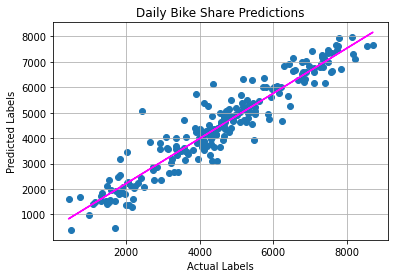

In [43]:
# Plot predicted vs actual
plt.scatter(y_test, final_prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, final_prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.grid()
plt.show()

In [44]:
#Save the final Model:
import joblib

joblib.dump(final_model,'final_model.pkl')

['final_model.pkl']

In [45]:
import joblib
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel



loaded_model=joblib.load('final_model.pkl')

new_data=X.iloc[:5]
predictions=final_model.predict(new_data)
predictions

array([1237.10786125, 1249.49968619, 1451.09773355, 1499.77524497,
       1756.38885036])

In [46]:
y.iloc[:5]

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [47]:
from sklearn.model_selection import learning_curve

train_sizes, train_rmse_scores, valid_rmse_scores = learning_curve(
    final_model, X_train, y_train, train_sizes=np.linspace(0.01, 1, 456), cv=10,
    scoring="neg_root_mean_squared_error",random_state=42)
train_rmse_errors = train_rmse_scores.mean(axis=1)
valid_rmse_errors = valid_rmse_scores.mean(axis=1)


#valid_errors

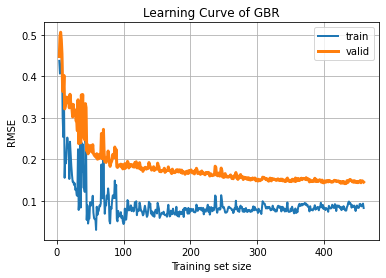

In [48]:
train_rmse_errors = train_rmse_scores.mean(axis=1)/y.mean()
valid_rmse_errors = valid_rmse_scores.mean(axis=1)/y.mean()

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, -train_rmse_errors, linewidth=2, label="train")
plt.plot(train_sizes, -valid_rmse_errors, linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.title("Learning Curve of GBR")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
#plt.axis([400, 700, 0, .3])
plt.show()

In [49]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer

score = make_scorer(r2_score)
train_sizes, train_scores, valid_scores = learning_curve(
    final_model, X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 456), cv=10,
    scoring=score,random_state=42)
train_scores = train_scores.mean(axis=1)
valid_scores = valid_scores.mean(axis=1)


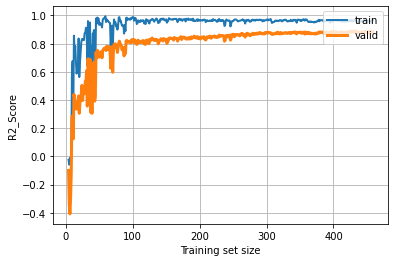

In [50]:

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_scores, linewidth=2, label="train")
plt.plot(train_sizes, valid_scores, linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("R2_Score")
plt.grid()
plt.legend(loc="upper right")
#plt.axis([400, 700, 0, 1])

plt.show()
#valid_scores

In [51]:
#The End! :)

In [52]:
# Use SMOGN for oversampling in regression problem
import smogn

bikes_smote = smogn.smoter(
                data=bikes,
                y='cnt',
                k=5,
                samp_method='extreme',
                rel_thres=0.9,
                rel_method='auto',
                rel_xtrm_type='high',
                rel_coef=0.9
            )

r_index: 100%|##########| 11/11 [00:00<00:00, 111.68it/s]


In [53]:
bikes_smote.shape

(1402, 13)

In [54]:
X=bikes_smote.drop(columns='cnt')
y=bikes_smote['cnt']

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,shuffle=True,
                                                    stratify=bikes_smote['holiday'])


In [56]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

full_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('GradientBoostingRegressor',GradientBoostingRegressor(
                            n_estimators = 500, subsample= 0.5, criterion ='friedman_mse', 
                            min_samples_split = 6, min_samples_leaf = 1, min_weight_fraction_leaf =0,
                            max_depth = 3, min_impurity_decrease = 0, init = None, random_state = 42,
                            max_features= 8, alpha = 0.01, max_leaf_nodes = None, warm_start = False,
                            validation_fraction=0.1, tol= 0.0001, ccp_alpha= 0, n_iter_no_change=10))
                        ])          
                       
#param=[{ 
#                #'GradientBoostingRegressor__n_estimators':randint(low=100, high=200),
#                'GradientBoostingRegressor__min_samples_split':randint(low=2, high=10),
#                'GradientBoostingRegressor__subsample':np.linspace(start=.1,stop=.9),
#                'GradientBoostingRegressor__max_features':randint(low=5, high=10),
#                'GradientBoostingRegressor__alpha':np.linspace(start=0.0001,stop=.1),
#                
#            }]
#
param=[{ 
                'GradientBoostingRegressor__max_depth':[4],
                'GradientBoostingRegressor__learning_rate':[0.01,.05,.1],
                'GradientBoostingRegressor__criterion':["friedman_mse",'squared_error'],
                'GradientBoostingRegressor__min_samples_split':[8],
                'GradientBoostingRegressor__subsample':[.5],
                'GradientBoostingRegressor__max_features':[8],
                'GradientBoostingRegressor__alpha':[.001],              
            }]

rnd_search=GridSearchCV(full_pipeline,param,cv=10,scoring='neg_root_mean_squared_error',verbose=1)
#rnd_search=GridSearchCV(full_pipeline,param,cv=10,scoring='neg_root_mean_squared_error',verbose=1)

rnd_search.fit(X_train,y_train)
print('best score=',-rnd_search.best_score_)
rnd_rmse=-cross_val_score(rnd_search.best_estimator_,X_train,y_train,
                          scoring='neg_root_mean_squared_error',cv=10)
rnd_rmse_percentage=rnd_rmse.mean().round(1)/y.mean()
print('rmse percentage:',rnd_rmse_percentage)
print(rnd_search.best_params_)


Fitting 10 folds for each of 6 candidates, totalling 60 fits
best score= 532.964654612481
rmse percentage: 0.08651835035470896
{'GradientBoostingRegressor__alpha': 0.001, 'GradientBoostingRegressor__criterion': 'friedman_mse', 'GradientBoostingRegressor__learning_rate': 0.05, 'GradientBoostingRegressor__max_depth': 4, 'GradientBoostingRegressor__max_features': 8, 'GradientBoostingRegressor__min_samples_split': 8, 'GradientBoostingRegressor__subsample': 0.5}


In [57]:
rnd_search.best_estimator_['GradientBoostingRegressor'].n_estimators_

125

In [58]:
import dataframe_image as dfi
best_params=rnd_search.best_params_
best_params['GradientBoostingRegressor__n_estimators_']=rnd_search.best_estimator_['GradientBoostingRegressor'].n_estimators_

GBR_rnd_best_param=pd.DataFrame.from_dict(best_params,orient='index',columns=['best value'])
GBR_rnd_best_param['best value']
dfi.export(GBR_rnd_best_param, "RND_BestHyperParameters.png")

GBR_rnd_best_param



,best value
GradientBoostingRegressor__alpha,0.001
GradientBoostingRegressor__criterion,friedman_mse
GradientBoostingRegressor__learning_rate,0.05
GradientBoostingRegressor__max_depth,4
GradientBoostingRegressor__max_features,8
GradientBoostingRegressor__min_samples_split,8
GradientBoostingRegressor__subsample,0.5
GradientBoostingRegressor__n_estimators_,125


In [59]:
from sklearn.metrics import mean_squared_error,r2_score

final_rnd_model=rnd_search.best_estimator_
final_rnd_prediction=final_rnd_model.predict(X_test)
final_rnd_rmse=mean_squared_error(y_pred=final_rnd_prediction,y_true=y_test,squared=False)
final_rnd_rmse_percentage=final_rnd_rmse.round(1)/y.mean()
print('final rmse percentage:',final_rnd_rmse_percentage)
#train the best model in the whole data set including the train and test datat set.
rnd_model=final_rnd_model.fit(X,y)


final rmse percentage: 0.07862943510660604


In [60]:
#final_rnd_prediction=final_rnd_model.predict(X_test)
#final_rnd_rmse=mean_squared_error(y_pred=final_rnd_prediction,y_true=y_test,squared=False)
#final_rnd_rmse
#final_rnd_rmse_percentage=final_rnd_rmse.round(1)/y.mean()
#print('final rmse percentage:',final_rnd_rmse_percentage)

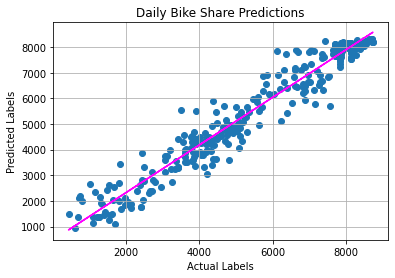

In [61]:
# Plot predicted vs actual
plt.scatter(y_test, final_rnd_prediction)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, final_rnd_prediction, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.grid()
plt.show()

In [62]:
#*We* can compute a 95% confidence interval for the test RMSE:
from scipy import stats

confidence = 0.95
rnd_squared_errors = (final_rnd_prediction - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(rnd_squared_errors) - 1,
                         loc=rnd_squared_errors.mean(),
                         scale=stats.sem(rnd_squared_errors)))/y.mean()

array([0.07016885, 0.08626376])

In [63]:
# extra code – computes a confidence interval again using a z-score
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * rnd_squared_errors.std(ddof=1) / np.sqrt(len(rnd_squared_errors))
final_rnd_c1,final_rnd_c2=np.sqrt(rnd_squared_errors.mean() - zmargin)/y.mean(), np.sqrt(
                            rnd_squared_errors.mean() + zmargin)/y.mean()
final_rnd_confidence_interval=final_rnd_c2-final_rnd_c1


In [64]:
final_rnd_r2=r2_score(y_true=y_test,y_pred=final_rnd_prediction)
final_rnd_r2

0.9544894083024373

In [1]:
A_B_testing=[('GBR_With_SMOTE',final_rnd_r2,final_rnd_rmse_percentage,final_rnd_c1,final_rnd_c2,
                final_rnd_confidence_interval),('GBR_Without_SMOTE',final_r2,final_rmse_percentage,
                final_c1,final_c2,final_confidence_interval)]




NameError: name 'final_rnd_r2' is not defined

In [66]:
A_B_testing_results=pd.DataFrame(A_B_testing,
           columns=['Model','R2','RMSE','C1','C2','Confidence Interval']).sort_values(by='RMSE',
           ignore_index=True)
A_B_testing_results

,Model,R2,RMSE,C1,C2,Confidence Interval
0,GB_Model_With_SMOTE,0.954489,0.078629,0.070195,0.086243,0.016048
1,GB_Model_Without_SMOTE,0.901730,0.131584,0.112897,0.147916,0.035020


In [67]:
confidence_interval_testing=A_B_testing_results[['Model','C1','C2','Confidence Interval']]


In [68]:
import dataframe_image as dfi
dfi.export(A_B_testing_results, "A_B_testing_results.png")


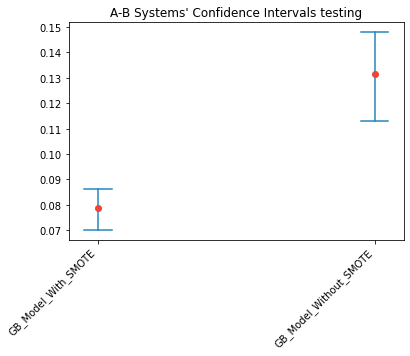

In [69]:
plt.xticks(range(len(confidence_interval_testing)),list(confidence_interval_testing['Model']),rotation = 45,
                    ha="right")
plt.title('A-B Systems\' Confidence Intervals testing')
for c1,c2,b in zip(confidence_interval_testing['C1'],confidence_interval_testing['C2'],
                   range(len(confidence_interval_testing))):
    color='#2187bb'
    horizontal_line_width=.1
    left = b - horizontal_line_width / 2
    right = b + horizontal_line_width / 2
    #plt.plot((b,b),(c1,c2),'ro-',color='orange')
    plt.plot([b, b], [c2, c1], color=color)
    plt.plot([left, right], [c2, c2], color=color)
    plt.plot([left, right], [c1, c1], color=color)
    plt.plot(b, A_B_testing_results['RMSE'][b], 'o', color='#f44336')

#plt.xticks(range(len(confidence_interval_results)),list(confidence_interval_results['Model']))
plt.show()